# Customer churn classification challenge

The `telecom.csv` dataset will be used in this challenge. The goal is to predict the `Churn?` column.

Customer churn was one of the first widely adopted machine learning applications. It helps predicting customers that might leave (e.g. for competitors), in order to make an offer and retain them for example.

# I. Data Exploration & Data Preparation

In [1]:
import pandas as pd
data= pd.read_csv("telecom.csv")
data.head()
#Area Code, Intl Plan, VMail Plan

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
# No missing values
data.isna().sum()

Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [3]:
# There is no duplicate
data.duplicated().sum()

0

In [4]:
data.corr()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


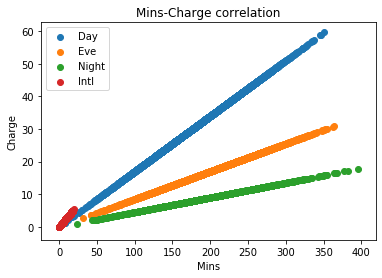

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data["Day Mins"],data["Day Charge"] , label="Day")
plt.scatter(data["Eve Mins"],data["Eve Charge"] , label="Eve")
plt.scatter(data["Night Mins"],data["Night Charge"] , label="Night")
plt.scatter(data["Intl Mins"],data["Intl Charge"] , label="Intl")
plt.legend()
plt.xlabel('Mins')
plt.ylabel('Charge')
plt.title('Mins-Charge correlation')
plt.show()

> There is a clear, strong correlation between the charges and minutes, thus no need to keep them both, well

,VMail Message,VMail Plan
0,25,yes
1,26,yes
2,0,no
3,0,no
4,0,no


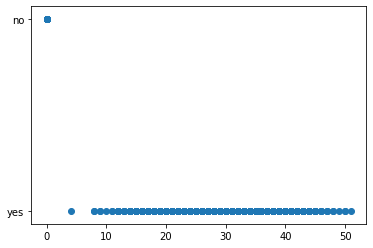

In [7]:
plt.scatter(data["VMail Message"],data["VMail Plan"])
data.loc[:,["VMail Message","VMail Plan"]].head()

> It seems there is a sort of correlation between the VMail Message and the VMail Plan variables. 

In [8]:
temp=data.loc[:,["VMail Message","VMail Plan"]]
temp["VMail Message"]=temp["VMail Message"]>0
temp["VMail Plan"]=temp["VMail Plan"]=="yes"
sum(temp["VMail Message"]!=temp["VMail Plan"])

0

> If a subscription to the VMail Plan exists, there will be at least one VMail Message 

In [9]:
#Preparing the data 
#Based on the previous analysis, the following features will be used
data.head()
data.columns
features = ['Account Length', 'Area Code', "Int'l Plan", 'VMail Plan', 'VMail Message',
            'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge','Night Calls', 'Night Charge',
            'Intl Calls','Intl Charge', 'CustServ Calls']
X = data[features]
y = data["Churn?"]
y.value_counts(normalize=True)

False.    0.855086
True.     0.144914
Name: Churn?, dtype: float64

> The data has 85% non-churner

In [10]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [11]:
#Preparing qualitative data with one hot encoding 
quali_feats = ['Area Code', "Int'l Plan", 'VMail Plan']
X_train_quali =  pd.get_dummies(X_train[quali_feats],drop_first=True)
X_test_quali =  pd.get_dummies(X_test[quali_feats],drop_first=True)
y_train = y_train == "True."
y_test = y_test == "True."

In [12]:
#Preparing quantitative data 
X_train_quanti = X_train.drop(columns=quali_feats)
X_test_quanti = X_test.drop(columns=quali_feats)

from sklearn.preprocessing import StandardScaler
# Rescale the quantitative features
scaler = StandardScaler()
X_train_quanti = scaler.fit_transform(X_train_quanti)
X_test_quanti = scaler.transform(X_test_quanti)

In [13]:
# Concatenate it all together
import numpy as np
X_train = np.concatenate([X_train_quanti, X_train_quali], axis=1)
X_test = np.concatenate([X_test_quanti, X_test_quali], axis=1)

In [14]:
from imblearn.over_sampling import SMOTE
# Instantiate the object with a 45% strategy
smote = SMOTE(sampling_strategy=0.45)
# SMOTE the train dataset / Oversampling
X_train, y_train = smote.fit_sample(X_train, y_train)
# Check the balance
y_train.value_counts()

False    2280
True     1026
Name: Churn?, dtype: int64

# II. Model Training and Optimization

In [16]:
#Trying a simple logistic regression
#Recall score is best to look at becasue the cost of false positive (not detected churner) is high

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters we want to test
param_grid = {'penalty': ['l2','l1', 'none'], 
              'C': [0.01, 0.1, 1.],
              'max_iter': [10, 100, 1000]}
# Define the gridsearch object
grid = GridSearchCV(LogisticRegression(),
                    param_grid,
                    scoring='recall',
                    cv=5,
                    return_train_score=True)
# Fit and wait
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'none'}

In [17]:
grid.best_params_
grid.best_score_

0.5292446128344779

> We need a more complex model

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': [10, 50, 100,300],
               'learning_rate': [0.1, 0.03, 0.01],
               'max_depth': [3, 5, 8]}

grid = GridSearchCV(GradientBoostingClassifier(),
                    param_grid=grid_params,
                    scoring='recall',
                    cv=5,
                    return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.03, 0.01],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [10, 50, 100, 300]},
             return_train_score=True, scoring='recall')

In [19]:
# Print the best score
print('best score:', grid.best_score_)
# Print the best hyperparams
print('best hyperparams:', grid.best_params_)

best score: 0.8782192753966374
best hyperparams: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}


In [20]:
# Display mean train recall
print(grid.cv_results_['mean_train_score'])
# Display mean valid recall
print(grid.cv_results_['mean_test_score'])


[7.57799828e-01 8.60137548e-01 8.95959419e-01 9.59555866e-01
 8.32600339e-01 9.20569799e-01 9.68570155e-01 1.00000000e+00
 8.89622709e-01 9.88062446e-01 1.00000000e+00 1.00000000e+00
 2.19512195e-03 7.86311161e-01 8.38450432e-01 8.87432043e-01
 0.00000000e+00 8.50630106e-01 8.78414189e-01 9.61017498e-01
 7.30816078e-04 9.01805948e-01 9.32505273e-01 1.00000000e+00
 0.00000000e+00 4.64168622e-01 7.56337601e-01 8.38207124e-01
 0.00000000e+00 7.63885803e-01 8.27728231e-01 8.76951665e-01
 0.00000000e+00 8.67937970e-01 8.88160482e-01 9.31042750e-01]
[0.73392849 0.83046176 0.84217855 0.85291025 0.78074355 0.84215013
 0.86654985 0.87533033 0.79438788 0.84992659 0.8674923  0.87821928
 0.00097087 0.76121714 0.81192517 0.8373005  0.         0.79243666
 0.82264741 0.85776936 0.00097561 0.80997395 0.83044755 0.8596969
 0.         0.40071513 0.73491357 0.81192044 0.         0.70375089
 0.76805588 0.82265214 0.         0.77001658 0.79439261 0.8294672 ]


> Looking at the train and test scores we dont see overfitting

# III. Evaluating the model

In [21]:
from sklearn.metrics import recall_score, accuracy_score
y_pred = grid.predict(X_test)
print('Recall score:', recall_score(y_test, y_pred))

Recall score: 0.8556701030927835


> Recall score is 85.5%

In [22]:
# Feature importance
df_feature_importance = pd.DataFrame(grid.best_estimator_.feature_importances_, index = features, 
                                     columns = ['feature importance']).sort_values('feature importance', 
                                                                                   ascending = False)
df_feature_importance

,feature importance
VMail Plan,0.244078
Intl Charge,0.190712
Night Charge,0.170833
Day Calls,0.111760
Night Calls,0.056948
Eve Calls,0.046216
Eve Charge,0.045309
Area Code,0.040263
CustServ Calls,0.023855
VMail Message,0.020497
